## Dataset Introduction

<h5 style="color: #ff5733 ">1. For this project, we will use the TripAdvisor data set collected by Wang et al.[2] The data set consists of 235,793 text reviews along with star ratings for the overall service and seven individual aspects.</h5>
<h5 style="color: #ff5733 ">2. These reviews are stored as .txt files for specific hotels in specific directories with the name of their cities</h5>
<h5 style="color: #ff5733 ">3. The details of all the hotels and their aspect based ratings are stored in the form of multiple csv files.</h5>
<h5 style="color: #ff5733 ">4. These files are merged to a single csv file named combined.csv which is being imported.</h5>

In [1]:
#########################################
#--- Importing the Standard libraries ---
#########################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,4]

In [2]:
#############################
# ---Importing the dataset---
#############################

data = pd.read_csv('../Prepared Data/Combined_Cities.csv', usecols=range(18))
data.head()

,Doc_ID,Hotel_Name,Hotel_URL,Street,City,State,Country,Zip,Class,Price,Num_Reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,COMFORT,OVERALL_RATING
0,china_beijing_holiday_inn_central_plaza,holiday inn central plaza,http://www.tripadvisor.com/ShowUserReviews-g29...,no.1 caiyuan street xuanwu district,beijing,-1,China,100053,-1,-1,206,4.786408,4.631068,4.733010,3.553398,4.699029,0.0,4.480583
1,china_beijing_hilton_beijing_wangfujing,hilton beijing wangfujing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.8 wangfujing east street dongcheng,beijing,-1,China,100006,-1,-1,58,4.810345,4.844828,4.758621,4.827586,4.517241,0.0,4.751724
2,china_beijing_hotel_g,hotel g,http://www.tripadvisor.com/ShowUserReviews-g29...,a7 worker's stadium chaoyang district,beijing,-1,China,100020,-1,-1,104,4.769231,4.750000,4.576923,4.375000,4.653846,0.0,4.625000
3,china_beijing_the_regent_beijing,the regent beijing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.99 jinbao street dongcheng district,beijing,-1,China,100005,-1,-1,96,4.625000,4.812500,4.437500,4.645833,4.531250,0.0,4.610417
4,china_beijing_the_st_regis_beijing,the st regis beijing,http://www.tripadvisor.com/ShowUserReviews-g29...,no.21jianguomenwai street chaoyang district,beijing,-1,China,100020,-1,-1,65,4.846154,4.646154,4.615385,4.492308,4.184615,0.0,4.556923


In [3]:
##################
# ---Basic Info---
##################

print("Number of rows:", len(data))
print("Number of Columns:", len(data.columns))
print("\nColumns are:-\n {} \n".format(data.columns))

Number of rows: 3105
Number of Columns: 18

Columns are:-
 Index(['Doc_ID', 'Hotel_Name', 'Hotel_URL', 'Street', 'City', 'State',
       'Country', 'Zip', 'Class', 'Price', 'Num_Reviews', 'CLEANLINESS',
       'ROOM', 'SERVICE', 'LOCATION', 'VALUE', 'COMFORT', 'OVERALL_RATING'],
      dtype='object') 



---

## Data Cleaning

In [4]:
# ---Insufficient Data---
# We can see that there are no null values here
# But there may be some ambiguous values with each associated column
# To check for that we need to do further analysis

data.isnull().sum()

Doc_ID            0
Hotel_Name        0
Hotel_URL         0
Street            0
City              0
State             0
Country           0
Zip               0
Class             0
Price             0
Num_Reviews       0
CLEANLINESS       0
ROOM              0
SERVICE           0
LOCATION          0
VALUE             0
COMFORT           0
OVERALL_RATING    0
dtype: int64

In [5]:
##################################
# --- Dropping the Bad Columns ---
##################################
# ['State', 'Price', 'Class'] all contain bad values like -1, etc.
# ['Hotel_URL', 'Street', 'Hotel_Name', 'Zip'] are neither required nor structured properly
# ['COMFORT'] contain maximum values of 0.0

data.drop(['State', 'Hotel_URL', 'Street', 'Hotel_Name', 'Price', 'Class', 'Zip', 'COMFORT'], axis = 1, inplace=True)
data.head()

,Doc_ID,City,Country,Num_Reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,OVERALL_RATING
0,china_beijing_holiday_inn_central_plaza,beijing,China,206,4.786408,4.631068,4.733010,3.553398,4.699029,4.480583
1,china_beijing_hilton_beijing_wangfujing,beijing,China,58,4.810345,4.844828,4.758621,4.827586,4.517241,4.751724
2,china_beijing_hotel_g,beijing,China,104,4.769231,4.750000,4.576923,4.375000,4.653846,4.625000
3,china_beijing_the_regent_beijing,beijing,China,96,4.625000,4.812500,4.437500,4.645833,4.531250,4.610417
4,china_beijing_the_st_regis_beijing,beijing,China,65,4.846154,4.646154,4.615385,4.492308,4.184615,4.556923


In [6]:
###################################################################
# --- Changing the datatypes (as some of the values are strings)---
###################################################################

data['CLEANLINESS'] = data['CLEANLINESS'].astype(float).round(3)
data['SERVICE'] = data['SERVICE'].astype(float).round(3)
data['ROOM'] = data['ROOM'].astype(float).round(3)
data['LOCATION'] = data['LOCATION'].astype(float).round(3)
data['VALUE'] = data['VALUE'].astype(float).round(3)
data['OVERALL_RATING'] = data['OVERALL_RATING'].astype(float).round(3)

In [7]:
###############################
# --- Dropping the bad rows ---
###############################
# Many rows contain 0 value for different aspects -> These are the rows with no reviews --(284 such rows)

data.drop(data[(data.CLEANLINESS == 0)].index, axis=0, inplace=True)

In [8]:
############################################################
# ---Finally Saving our Cleaned DataFrame into a csv file---
############################################################

data.to_csv(path_or_buf="../Prepared Data/Dataset.csv", index=False)
data.head()

,Doc_ID,City,Country,Num_Reviews,CLEANLINESS,ROOM,SERVICE,LOCATION,VALUE,OVERALL_RATING
0,china_beijing_holiday_inn_central_plaza,beijing,China,206,4.786,4.631,4.733,3.553,4.699,4.481
1,china_beijing_hilton_beijing_wangfujing,beijing,China,58,4.810,4.845,4.759,4.828,4.517,4.752
2,china_beijing_hotel_g,beijing,China,104,4.769,4.750,4.577,4.375,4.654,4.625
3,china_beijing_the_regent_beijing,beijing,China,96,4.625,4.812,4.438,4.646,4.531,4.610
4,china_beijing_the_st_regis_beijing,beijing,China,65,4.846,4.646,4.615,4.492,4.185,4.557


---

## Basic Data Visualization

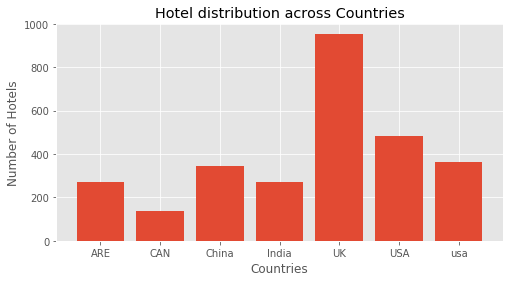

In [13]:
###########################################
# ---Hotel distribution across Countries---
###########################################
# UK has the maximum no. of hotels for our reviews

y = data['Country'].value_counts()
x = y.index
plt.bar(x,y)
plt.title('Hotel distribution across Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Hotels')
plt.show()

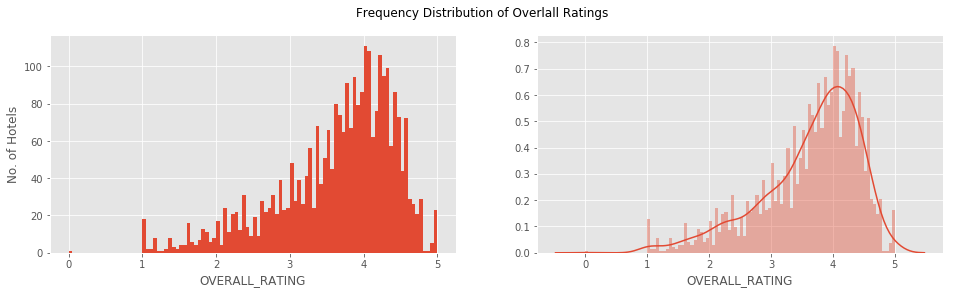

In [65]:
##########################################################
# --- Distribution of Overall Ratings among population ---
##########################################################
# Ratings are generally distributed between 3.5 to 4.5
# This is a bell curve which is right skewed

f, ax = plt.subplots(1,2)
f.set_figwidth(16)
f.set_figheight(4)

x = data.OVERALL_RATING
ax[0].hist(x, bins=100)
sns.distplot(x, bins=100, ax=ax[1])
ax[0].set_ylabel('No. of Hotels')
ax[0].set_xlabel('OVERALL_RATING')
plt.suptitle('Frequency Distribution of Overlall Ratings')
plt.show()

---